# 1. Boosting
In 1995. Freud and Schapire introduced the concept of **boosting** with the well know **AdaBoost** algorithm. The core concept of boosting is that rather than a independent individual hypothesis, combining hypothesis in a sequential order increases the accuracy. Essentially, boosting algorithms convert the *weak learners* into *strong learners*. Boosting algorithms are well designed to address the **bias** problems.
## 1.1. AdaBoosting
## Exercise 1: AdaBoosting

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Bagged decision trees for classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Read the data in
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab10/Diabetes.csv')

# Let's use some weak features to build the tree
X = df[['age','serum_insulin']]    # Independent variables
y = df['class'].values             # Dependent variable

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

kfold = model_selection.StratifiedKFold(n_splits = 5)
num_trees = 100

# Decision tree with 5-fold cross validation
# Lets restrict max_depth to 1 to have more impure leaves
clf_DT = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_DT, X_train, y_train, cv = kfold.split(X_train, y_train))
print('Decision tree (stand alone) - CV train: %.2f' % results.mean())
print('Decision tree (stand alone) - train: %.2f' % metrics.accuracy_score(clf_DT.predict(X_train), y_train))
print('Decision tree (stand alone) - test: %.2f' % metrics.accuracy_score(clf_DT.predict(X_test), y_test))

# Using adaptive boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(estimator = clf_DT, n_estimators = num_trees, learning_rate = 0.1).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_DT_Boost, X_train, y_train, cv = kfold)
print('\nDecision tree (AdaBoosting) - CV train: %.2f' % results.mean())
print('Decision tree (AdaBoosting) - train: %.2f' % metrics.accuracy_score(clf_DT_Boost.predict(X_train), y_train))
print('Decision tree (AdaBoosting) - test: %.2f' % metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Decision tree (stand alone) - CV train: 0.65
Decision tree (stand alone) - train: 0.66
Decision tree (stand alone) - test: 0.63

Decision tree (AdaBoosting) - CV train: 0.68
Decision tree (AdaBoosting) - train: 0.70
Decision tree (AdaBoosting) - test: 0.71


**Questions:**
1. Explain, how adaptive boosting is performed?
2. Execute the above code several times and compare the results obtained using the **dection tree with 5-fold cross validation** model and the **adaptive boosting** model.

**Answers:**

## 1.2. Gradient boosting
Due to the stage wise addictivity, the loss function can be represented in a form suitable for optimization. This gave birth to a class of generalized boosting algorithms known as **generalized boosting** algorithm (**GBM**).

**Gradient boosting** is an example implementation of **GBM** and it can work with different loss functions such as regression, classification, risk modelling etc. As the name suggested it is a boosting algorithm which identifies shortcomings of a *weak learner* by **gradients** (**AdaBoost** uses high-weight data points), hence the name **gradient boosting**.
## Exercise 2: Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
num_trees = 100
# Using gradient boosting of 100 iterations
clf_GBT = GradientBoostingClassifier(n_estimators = num_trees, learning_rate = 0.1).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_GBT, X_train, y_train, cv = kfold)

print ('Gradient boosting - CV train: %.2f' % results.mean())
print ('Gradient boosting - train: %.2f' % metrics.accuracy_score(clf_GBT.predict(X_train), y_train))
print ('Gradient boosting - test: %.2f' % metrics.accuracy_score(clf_GBT.predict(X_test), y_test))

Gradient boosting - CV train: 0.67
Gradient boosting - train: 0.80
Gradient boosting - test: 0.68


**Questions:**
1. How does the number of independent trees used to build a **gradient boosting** model affect its effectiveness? Check this for a various number of trees.
2. Execute the above code several times and compare the results obtained using the **adaptive boosting** and **gradient boosting** models.

**Answers:**

## 1.3. XGBoost (eXtreme Gradient Boosting)
In March 2014, Tianqui Chen built **xgboost** in C++ as part of Distributed (Deep) Machine Learning Community that has interface for Python. It is an extended, more regularized version of **gradient boosting** algorithm. This is one of the most well performing large-scale, scalable machine learning algorithms which has been playing a major role in winning solutions of Kaggle (forum for predictive modelling and analytics competition) data science competition. sklearn has a wrapper for **xgboost** (**XGBClassifier**).
## Exercise 3: XGBoost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Read the data in
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab10/Diabetes.csv')

predictors = ['age','serum_insulin']
target = 'class'

df.fillna((-999), inplace = True)

# Let's use some weak features to build the tree
X = df[['age','serum_insulin']]    # Independent variables
y = df['class'].values             # Dependent variable

# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

num_rounds = 100
kfold = model_selection.StratifiedKFold(n_splits = 5)

clf_XGB = XGBClassifier(n_estimators = num_rounds,
                        objective= 'binary:logistic',
                        eval_metric = 'logloss',
                        seed = 2024)

clf_XGB.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            verbose = False)

results = model_selection.cross_val_score(clf_XGB, X_train,y_train, cv = kfold)
print ('xgBoost - CV train: %.2f' % results.mean())
print ('xgBoost - train: %.2f' % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))
print ('xgBoost - test: %.2f' % metrics.accuracy_score(clf_XGB.predict(X_test), y_test))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

# Sorry, this code was resulting in AttributeError, so I tried to modify it using another package if it's allowed. Thank you.

This is what i got when running this cell

```
AttributeError                            Traceback (most recent call last)
<ipython-input-22-52c10a47612a> in <cell line: 38>()
     36             verbose = False)
     37
---> 38 results = model_selection.cross_val_score(clf_XGB, X_train,y_train, cv = kfold)
     39 print ('xgBoost - CV train: %.2f' % results.mean())
     40 print ('xgBoost - train: %.2f' % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))

6 frames

/usr/local/lib/python3.10/dist-packages/sklearn/base.py in __sklearn_tags__(self)
    538
    539     def __sklearn_tags__(self):
--> 540         tags = super().__sklearn_tags__()
    541         tags.estimator_type = "classifier"
    542         tags.classifier_tags = ClassifierTags()

AttributeError: 'super' object has no attribute '__sklearn_tags__'
```




In [ ]:
!pip install --upgrade xgboost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Read the data in
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab10/Diabetes.csv')

predictors = ['age','serum_insulin']
target = 'class'

df.fillna((-999), inplace = True)

# Let's use some weak features to build the tree
X = df[['age','serum_insulin']]    # Independent variables
y = df['class'].values             # Dependent variable

# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

num_rounds = 100
kfold = model_selection.StratifiedKFold(n_splits = 5)

clf_XGB = XGBClassifier(n_estimators = num_rounds,
                        objective= 'binary:logistic',
                        eval_metric = 'logloss',
                        seed = 2024)

clf_XGB.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            verbose = False)

# The modification: Use xgboost's cross-validation
try:
  results = model_selection.cross_val_score(clf_XGB, X_train,y_train, cv = kfold)
except AttributeError:
  print("Using xgboost's cv instead of sklearn's")
  # create DMatrix for xgboost.cv
  dtrain = xgb.DMatrix(X_train, label=y_train)
  # parameters for xgboost.cv
  params = clf_XGB.get_params()
  # use xgboost's cross-validation
  results = xgb.cv(params, dtrain, num_boost_round=num_rounds,
                   nfold=kfold.n_splits, metrics='logloss',
                   as_pandas=True, seed=2024)['test-logloss-mean'].tail(1).values[0]

print ('xgBoost - CV train: %.2f' % results.mean() if hasattr(results, 'mean') else results) # print results based on type
print ('xgBoost - train: %.2f' % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))
print ('xgBoost - test: %.2f' % metrics.accuracy_score(clf_XGB.predict(X_test), y_test))

Using xgboost's cv instead of sklearn's
xgBoost - CV train: 0.65
xgBoost - train: 0.84
xgBoost - test: 0.67


**Questions:**
1. What is a difference between adaptive boosting, gradient boosting and eXtreme gradient boosting?
2. Based on several model builds, compare the effectiveness of the xgboost model with the gradient boosting and adaptive boosting models.

**Answers:**

## Exercise 4: XGBoost using native interface
**xgboost** has its own internal data structure **DMatrix** for input data. It is good practice to convert large dataset to **DMatrix** object to save preprocessing time.

In [ ]:
xgtrain = xgb.DMatrix(X_train, label = y_train, missing = -999)
xgtest = xgb.DMatrix(X_test, label = y_test, missing = -999)

# Set xgboost params
param = {'max_depth': 43,  # The maximum depth of each tree
         'objective': 'binary:logistic',
         'eval_metric': 'logloss'}

clf_xgb_cv = xgb.cv(param, xgtrain, num_rounds,
                    stratified = True,
                    nfold = 5,
                    early_stopping_rounds = 20)

print ('Optimal number of trees / estimators is %i\n' % clf_xgb_cv.shape[0])

watchlist  = [(xgtest, 'test'), (xgtrain, 'train')]
clf_xgb = xgb.train(param, xgtrain, clf_xgb_cv.shape[0], watchlist)

# predict() function will produce the probability
# so we'll use 0.5 cut-off to convert probability to class label
y_train_pred = (clf_xgb.predict(xgtrain) >= 0.5).astype(int)
y_test_pred = (clf_xgb.predict(xgtest) >= 0.5).astype(int)

print ('\nXGB - train: %.2f' % metrics.accuracy_score(y_train_pred, y_train))
print ('XGB - test: %.2f' % metrics.accuracy_score(y_test_pred, y_test))

Optimal number of trees / estimators is 5

[0]	test-logloss:0.64734	train-logloss:0.57660
[1]	test-logloss:0.63355	train-logloss:0.53356
[2]	test-logloss:0.62954	train-logloss:0.50622
[3]	test-logloss:0.63299	train-logloss:0.48361
[4]	test-logloss:0.63526	train-logloss:0.46583

XGB - train: 0.78
XGB - test: 0.68


**Questions:**
1. Explain the meaning of the **max_depth** parameter.
2. How does the value of the **max_depth** parameter affect the **xgboost** model? Check it out experimentally.

**Answers:**

## Exercise 5: Digit classification with gradient boosting
Let's look at the digit classification to illustrate how the model performance improves with each iteration. The file *digit.csv* contains **20 000** observations, so the execution time of the following code can be even tens of seconds.

Gradient boosting - train: 0.75
Gradient boosting - test: 0.74
Predicted letter: ['M']


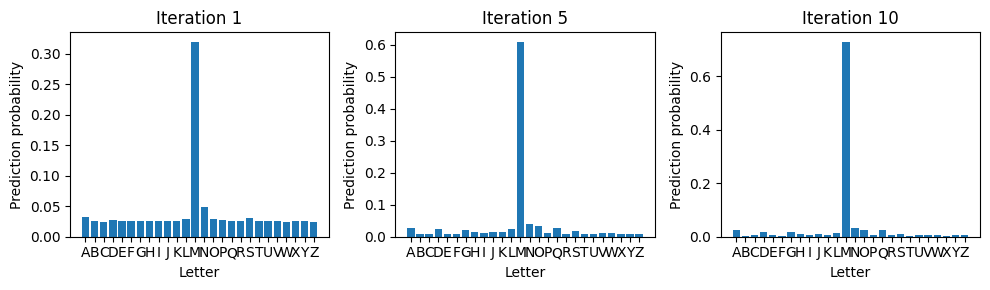

In [ ]:
df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab10/digit.csv')

X = df.iloc[:, 1:17].values
y = df['letter'].values

# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

kfold = model_selection.StratifiedKFold(n_splits = 5)
num_trees = 10

clf_GBT = GradientBoostingClassifier(n_estimators = num_trees, learning_rate = 0.1).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_GBT, X_train, y_train, cv = kfold)

print ('Gradient boosting - train: %.2f' % metrics.accuracy_score(clf_GBT.predict(X_train), y_train))
print ('Gradient boosting - test: %.2f' % metrics.accuracy_score(clf_GBT.predict(X_test), y_test))

# Let's predict for the letter 'T' and understand how the prediction accuracy changes in each boosting iteration
# X_valid = (2, 8, 3, 5, 1, 8, 13, 0, 6, 6, 10, 8, 0, 8, 0, 8)
# for letter O
# X_valid = (6, 13, 4, 7, 4, 6, 7, 6, 3, 10, 7, 9, 5, 9, 5, 8)
# for letter M
X_valid = (11, 15, 13, 9, 7, 13, 2, 6, 2, 12, 1, 9, 8, 1, 1, 8)


print ('Predicted letter:', clf_GBT.predict([X_valid]))

# Staged prediction will give the predicted probability for each boosting iteration
stage_preds = list(clf_GBT.staged_predict_proba([X_valid]))
final_preds = clf_GBT.predict_proba([X_valid])

# Plot
x = range(1, 27)
label = np.unique(df['letter'])

plt.figure(figsize = (10, 3))
plt.subplot(131)
plt.bar(x, stage_preds[0][0], align = 'center')
plt.xticks(x, label)
plt.xlabel('Letter')
plt.ylabel('Prediction probability')
plt.title('Iteration 1')
plt.autoscale()

plt.subplot(132)
plt.bar(x, stage_preds[5][0], align = 'center')
plt.xticks(x, label)
plt.xlabel('Letter')
plt.ylabel('Prediction probability')
plt.title('Iteration 5')
plt.autoscale()

plt.subplot(133)
plt.bar(x, stage_preds[9][0], align = 'center')
plt.xticks(x, label)
plt.autoscale()
plt.xlabel('Letter')
plt.ylabel('Prediction probability')
plt.title('Iteration 10')

plt.tight_layout()
plt.show()

**Questions:**
1. Explain, how does the model behave with each successive iteration for prediction of the letter **T** in comparison with other letters?
2. Run experiments and compare the prediction process for the letters **O** and **M**. What are the reasons for the differences?

**Answers:**

# 2. Hyperparameter tuning
One of the primary objective and challenge in machine learning process is improving the performance score, based on data patterns and observed evidence. To achieve this objective, almost all machine learning algorithms have specific set of parameters that needs to estimate from dataset which will maximize the performance score.

The best way to choose good hyperparameters is through trial and error of all possible combination of parameter values. Scikit-learn provide **GridSearch** and **RandomSearch** functions to facilitate automatic and reproducible approach for hyperparameter tuning.
## Exercise 6: GridSearch
The execution time for the following code will be approx. 15 minutes. Wait patiently until it's over.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
seed = 2024

# Read the data in
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab10/Diabetes.csv')

X = df.iloc[:,:8].values     # Independent variables
y = df['class'].values       # Dependent variable

# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

kfold = model_selection.StratifiedKFold(n_splits = 5)
num_trees = 100

clf_rf = RandomForestClassifier().fit(X_train, y_train)

rf_params = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'criterion':  ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [None, 1, 3, 5, 7, 9]
}

# Setting verbose = 10 will print the progress for every 10 task completion
grid = GridSearchCV(clf_rf, rf_params,
                    scoring = 'roc_auc',
                    cv = kfold,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)
print ('Best Parameters:', grid.best_params_)

base_model = model_selection.cross_val_score(clf_rf, X_train, y_train, cv = kfold)
gs_results = model_selection.cross_val_score(grid.best_estimator_, X_train, y_train, cv = kfold)
print ('\nAccuracy - base model train CV:', base_model.mean())
print ('Accuracy - GridSearch train CV:', gs_results.mean())
print ('Accuracy - train:', metrics.accuracy_score(grid.best_estimator_.predict(X_train), y_train))
print ('Accuracy - test:', metrics.accuracy_score(grid.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100}

Accuracy - base model train CV: 0.7578920041536863
Accuracy - GridSearch train CV: 0.7616649359640014
Accuracy - train: 0.9757914338919925
Accuracy - test: 0.7489177489177489


**Questions:**
1. What is the idea behind the **GridSearch** method?
2. What are the advantages and disadvantages of the **GridSearch** method?

**Answers:**

## Exercise 7: RandomSearch
The execution time in this case will be about 1 minute.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Specify parameters and distributions to sample from
param_dist = {'n_estimators': sp_randint(100, 1000),
              'criterion': ['gini', 'entropy'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None, 1, 3, 5, 7, 9]
             }

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf_rf, param_distributions = param_dist,
                                   cv = kfold,
                                   n_iter = n_iter_search,
                                   verbose = 1,
                                   n_jobs = -1,
                                   random_state = seed)

random_search.fit(X_train, y_train)

# Report(random_search.cv_results_)
print ('Best parameters:', random_search.best_params_)
results = model_selection.cross_val_score(random_search.best_estimator_, X_train, y_train, cv = kfold)
print ('\nAccuracy - train CV:', results.mean())
print ('Accuracy - train:', metrics.accuracy_score(random_search.best_estimator_.predict(X_train), y_train))
print ('Accuracy - test:', metrics.accuracy_score(random_search.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 484}

Accuracy - train CV: 0.7653686396677051
Accuracy - train: 1.0
Accuracy - test: 0.7748917748917749


**Questions:**
1. What is the idea behind the **RandomSearch** method?
2. What are the advantages and disadvantages of the **RandomSearch** method?
3. Compare the results of the **GridSearch** and **RandomSearch** methods in terms of the accuracy of the best model and the time taken to build it.

**Answers:**